In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning from Disaster

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Objective

In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

You may find more inforamtion here: https://www.kaggle.com/competitions/titanic/overview

# Load the data

In [2]:
def concat_df(train_data, test_data):
    # Returns a concatenated df of training and test set
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_all = concat_df(df_train, df_test)
dfs = [df_train, df_test]

df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set' 

submission = pd.read_csv('gender_submission.csv')

# Data Available

You may find more information here: https://www.kaggle.com/competitions/titanic/data?select=gender_submission.csv

| Variable	| Definition | 	Key | 
|:---------:|:----------:|:----:|
|survival |	Survival |	0 = No, 1 = Yes|
|pclass	| Ticket class |	1 = 1st, 2 = 2nd, 3 = 3rd|
|sex |	Sex	||
|Age |	Age in years|	|
|sibsp |	# of siblings / spouses aboard the Titanic	||
|parch |	# of parents / children aboard the Titanic	||
|ticket |	Ticket number	||
|fare |	Passenger fare	||
|cabin |	Cabin number||	
|embarked |	Port of Embarkation|	C = Cherbourg, Q = Queenstown, S = Southampton|

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [3]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train.info()
# il manque des données sur la colonne d'Age,de Cabin et d'Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [7]:
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')
    
for df in dfs:
    print('{}'.format(df.name))
    display_missing(df)

Training Set
PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2


Test Set
PassengerId column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 86
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 1
Cabin column missing values: 327
Embarked column missing values: 0




# Data Analysis

Seaborn: https://seaborn.pydata.org/examples/index.html
matplotlib: https://matplotlib.org/stable/gallery/index

Pandas (data managment): https://pandas.pydata.org/

# Pourcentage de survie

0    549
1    342
Name: Survived, dtype: int64


Text(0.5, 1.0, 'percent')

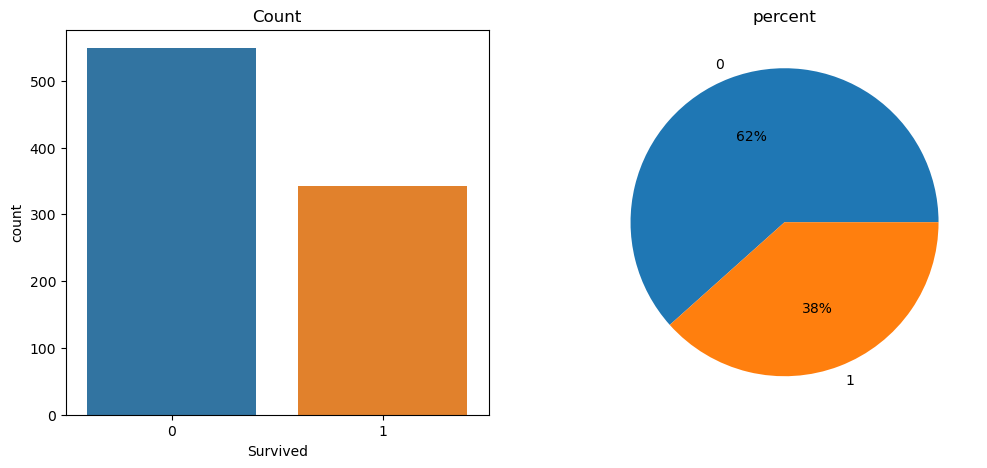

In [8]:
Survived_freq=df_train.Survived.value_counts()
print(Survived_freq)

%matplotlib inline
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.countplot(x='Survived',data=df_train)
plt.title('Count')
plt.subplot(122)
plt.pie(Survived_freq,labels=Survived_freq.index,autopct='%1.0f%%')
plt.title('percent')

<Figure size 640x480 with 0 Axes>

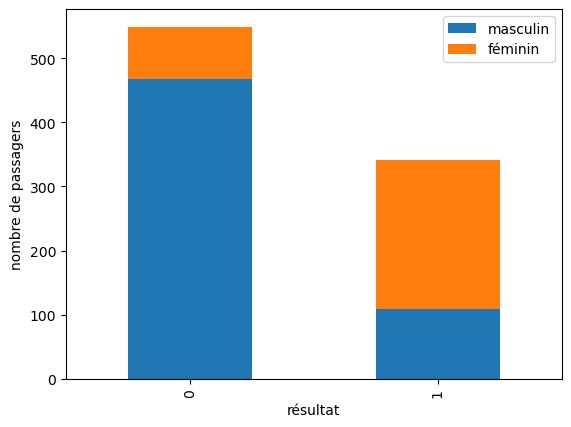

In [9]:
fig = plt.figure()
Survived_m = df_train.Survived[df_train.Sex == 'male'].value_counts()
Survived_f = df_train.Survived[df_train.Sex == 'female'].value_counts()
df = pd.DataFrame({u'masculin':Survived_m, u'féminin':Survived_f})
df.plot (kind = 'bar',stacked = True)
plt.xlabel(u'résultat')
plt.ylabel(u'nombre de passagers')
plt.show()

In [10]:
women = df_train.loc[df_train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

men = df_train.loc[df_train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


# Nombre des passagers vivants dans chaque class

In [11]:
# Nombre des passagers vivants dans chaque class
df_train.groupby('Pclass')['Pclass'].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

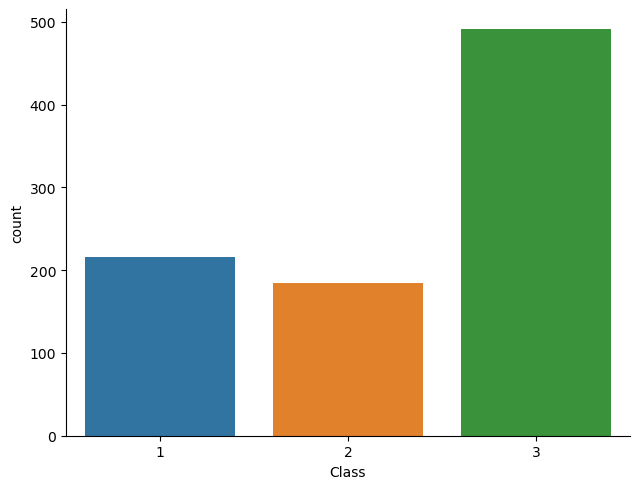

In [12]:
pclass = sns.catplot('Pclass', data=df_train, kind='count', aspect=1.3)
pclass.set_xlabels('Class')

# On ajoute une colonne Personne dans le tableau

In [13]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [14]:
df_train['person'] = df_train[['Age', 'Sex']].apply(male_female_child, axis=1)

In [15]:
df_train[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


# L'annalyse d'ages

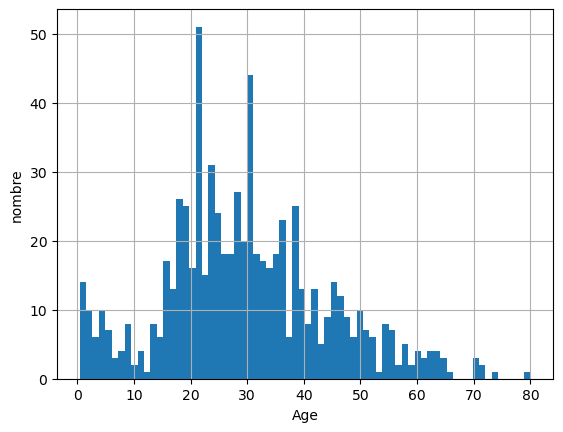

In [16]:
df_train['Age'].hist(bins=70)
plt.ylabel(u'nombre')
plt.xlabel(u'Age')
plt.show()

In [17]:
# On ignore les cabins manquants
deck = df_train['Cabin'].dropna()

In [18]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [19]:
deck.count()

204

# L'analyse des cabins

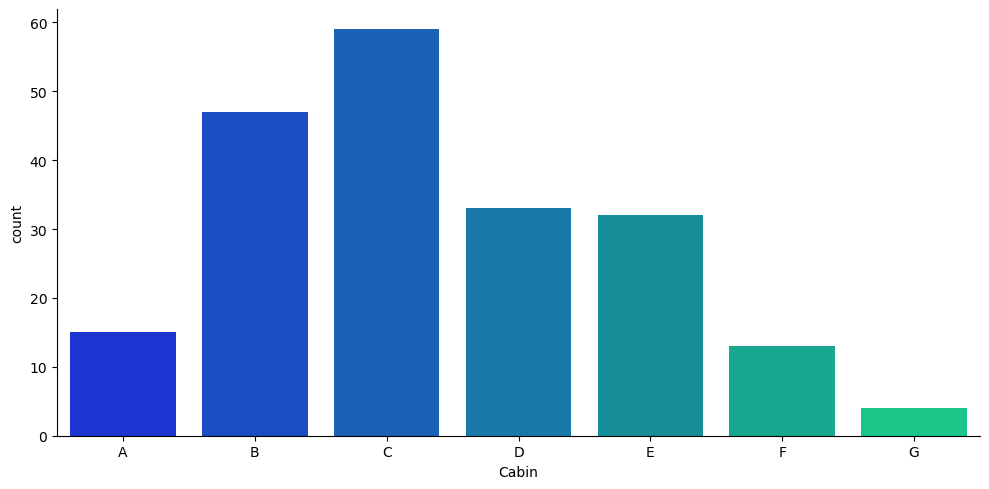

In [20]:
# on prend la première lettre des cabins
levels = []

for level in deck:
    levels.append(level[0])

    
#factorplot the cabins
cabin_df = DataFrame(levels)
cabin_df.columns=['Cabin']
sns.catplot('Cabin', data=cabin_df, kind='count', order=['A','B','C','D','E','F','G'], aspect=2, 
              palette='winter')

# L'analyse des ports d'embarquement

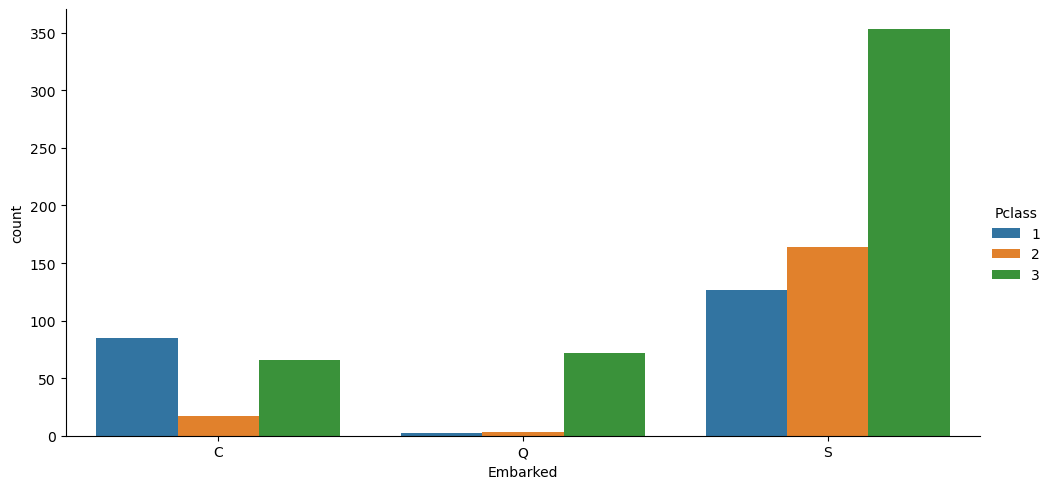

In [21]:
sns.catplot('Embarked',data=df_train,kind='count', hue='Pclass',order=['C','Q','S'],aspect=2) 

In [22]:
df_train[['SibSp','Parch']].head()

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0


In [23]:
# sibsb+parch pour vérifier si la personne est toute seule
df_train ['Situation'] =df_train.SibSp + df_train.Parch

In [24]:
df_train['Situation'].head()

0    1
1    1
2    0
3    1
4    0
Name: Situation, dtype: int64

In [25]:
# On remplace les cases de 'Alone' par leurs situations
df_train['Situation'].loc[df_train['Situation']>0] = 'With family'
df_train['Situation'].loc[df_train['Situation']==0] = 'Alone'

In [26]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Situation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


# L'analyse de situation familiale dans le bateau

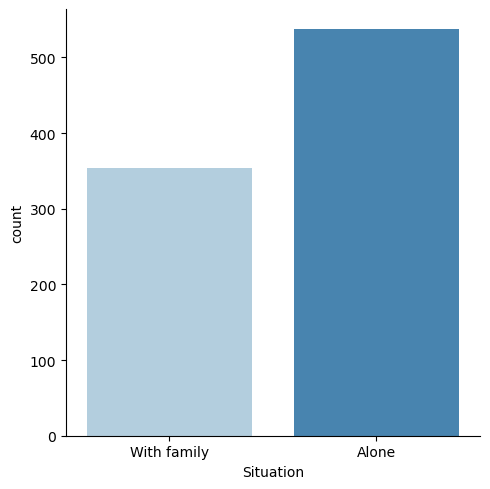

In [27]:
sns.factorplot('Situation',data=df_train,kind='count',palette='Blues')

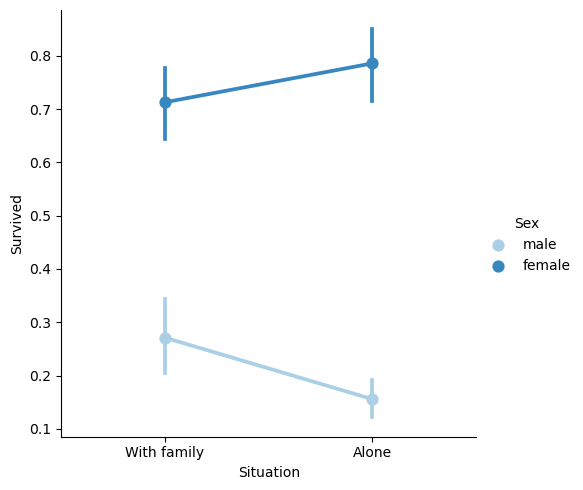

In [28]:
# situation familiale et sexe
sns.factorplot('Situation','Survived',data=df_train,hue='Sex',palette='Blues')

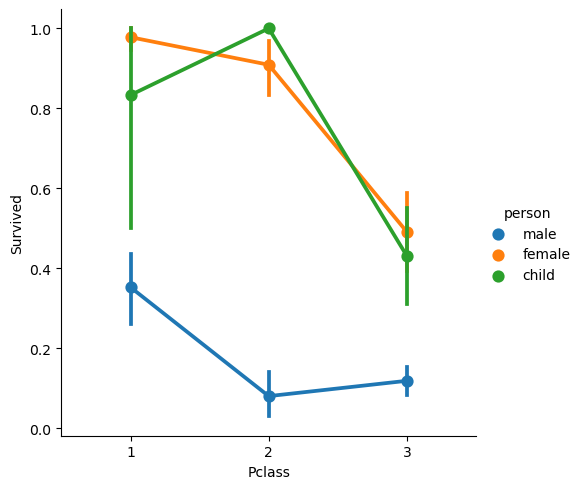

In [29]:
# class et sexe
sns.factorplot('Pclass','Survived',hue='person',data=df_train)

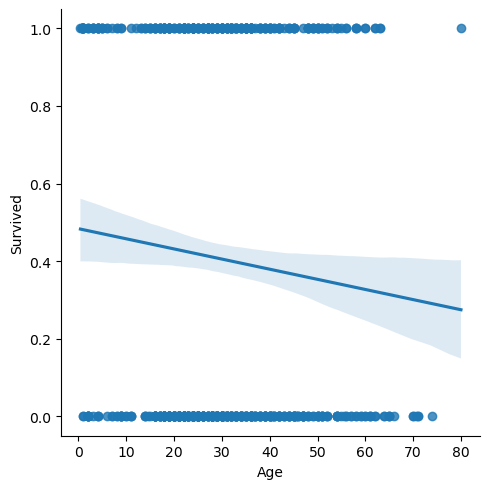

In [30]:
# age
sns.lmplot('Age','Survived',data=df_train)
# older, the less likely to survive

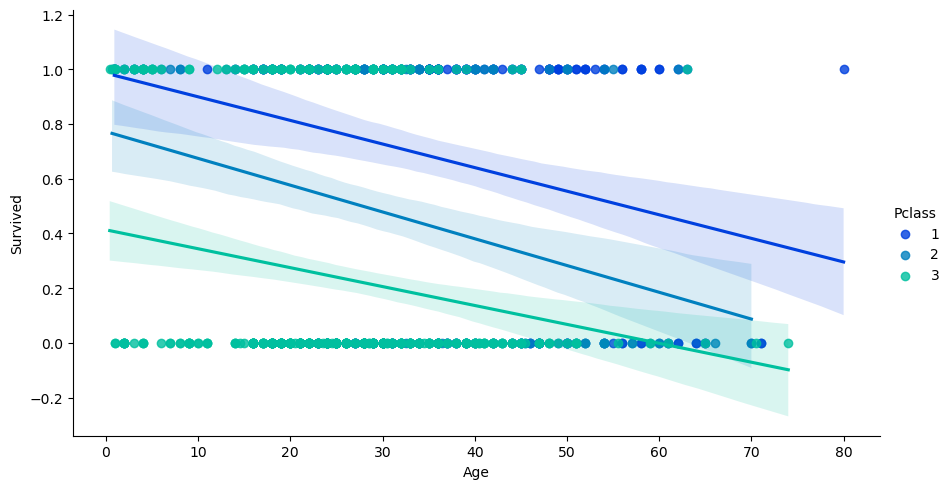

In [31]:
# class et age
sns.lmplot('Age','Survived',hue='Pclass',data=df_train,palette='winter',aspect=1.8)

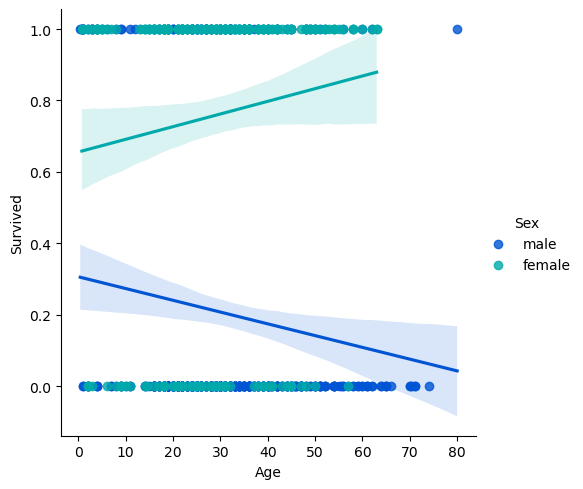

In [32]:
# how age and gender in relation to the survival
sns.lmplot('Age','Survived',hue='Sex',data=df_train,palette='winter')
# older female with most chance of survival

In [33]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
# compléter les cases d'Ages manquants avec la moyenne
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].mean())

df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
# age_values = {1:38, 2:30,3:24} df_train["Age"].fillna(df_train["Pclass"].map(age_values),implace = True)

In [36]:
#string to integer 

# remplacer les cases male avec 0, les cases female avec 1
df_train.loc[df_train["Sex"] == "male","Sex"] = 0
df_train.loc[df_train["Sex"] == "female","Sex"] = 1

In [37]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Situation
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S,male,With family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C,female,With family
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S,female,With family
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S,male,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,NaN,S,male,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,S,female,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,NaN,S,female,With family
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,C,male,Alone


In [38]:
# compléter les case d'embarquement manquants avec S
df_train["Embarked"] = df_train["Embarked"].fillna('S')

In [39]:
# remplacer les cases d'emparquement avec S=0, C=1, Q=2
df_train.loc[df_train["Embarked"] == "S", "Embarked"] = 0
df_train.loc[df_train["Embarked"] == "C", "Embarked"] = 1
df_train.loc[df_train["Embarked"] == "Q", "Embarked"] = 2

In [40]:
# calculer la coefficiant de la correlation¶
df_train.drop(["PassengerId"],axis=1,inplace=True) # PassengerId est unique pour tout les passagers, donc inutile 
cols = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize", "Title", "FamilyId", "NameLength"]
train_corr = df_train.corr(method='pearson')
train_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


Text(0.5, 1.0, 'annot=False')

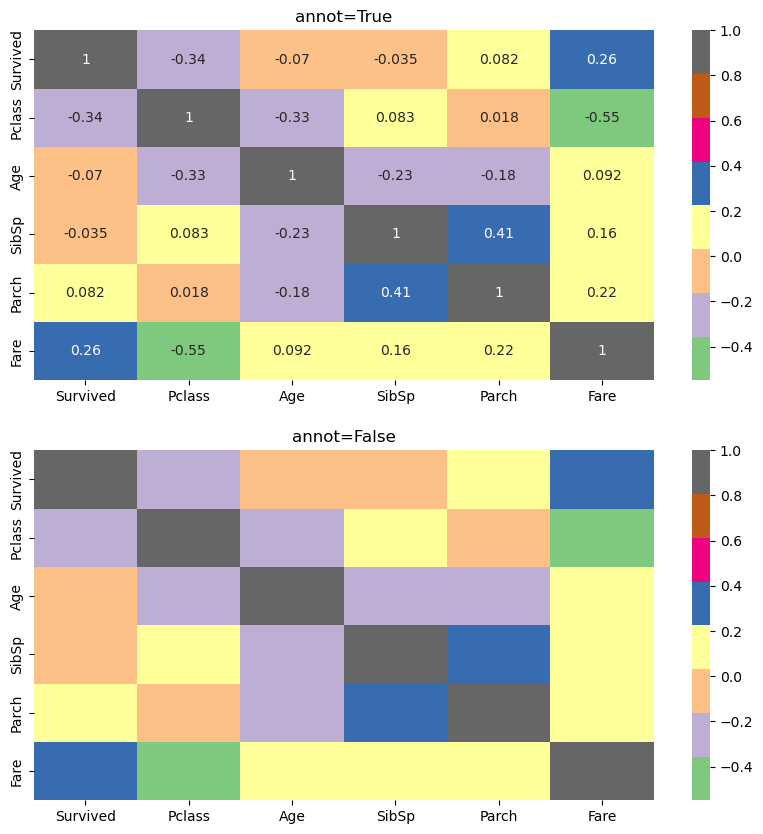

In [41]:
# Plot Heat map using Seaborn
fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=(10,10))
sns.heatmap(train_corr,annot=True,ax=ax1,cmap="Accent")
sns.heatmap(train_corr,annot=False,ax=ax2,cmap="Accent")
ax1.set_title('annot=True')
ax2.set_title('annot=False')

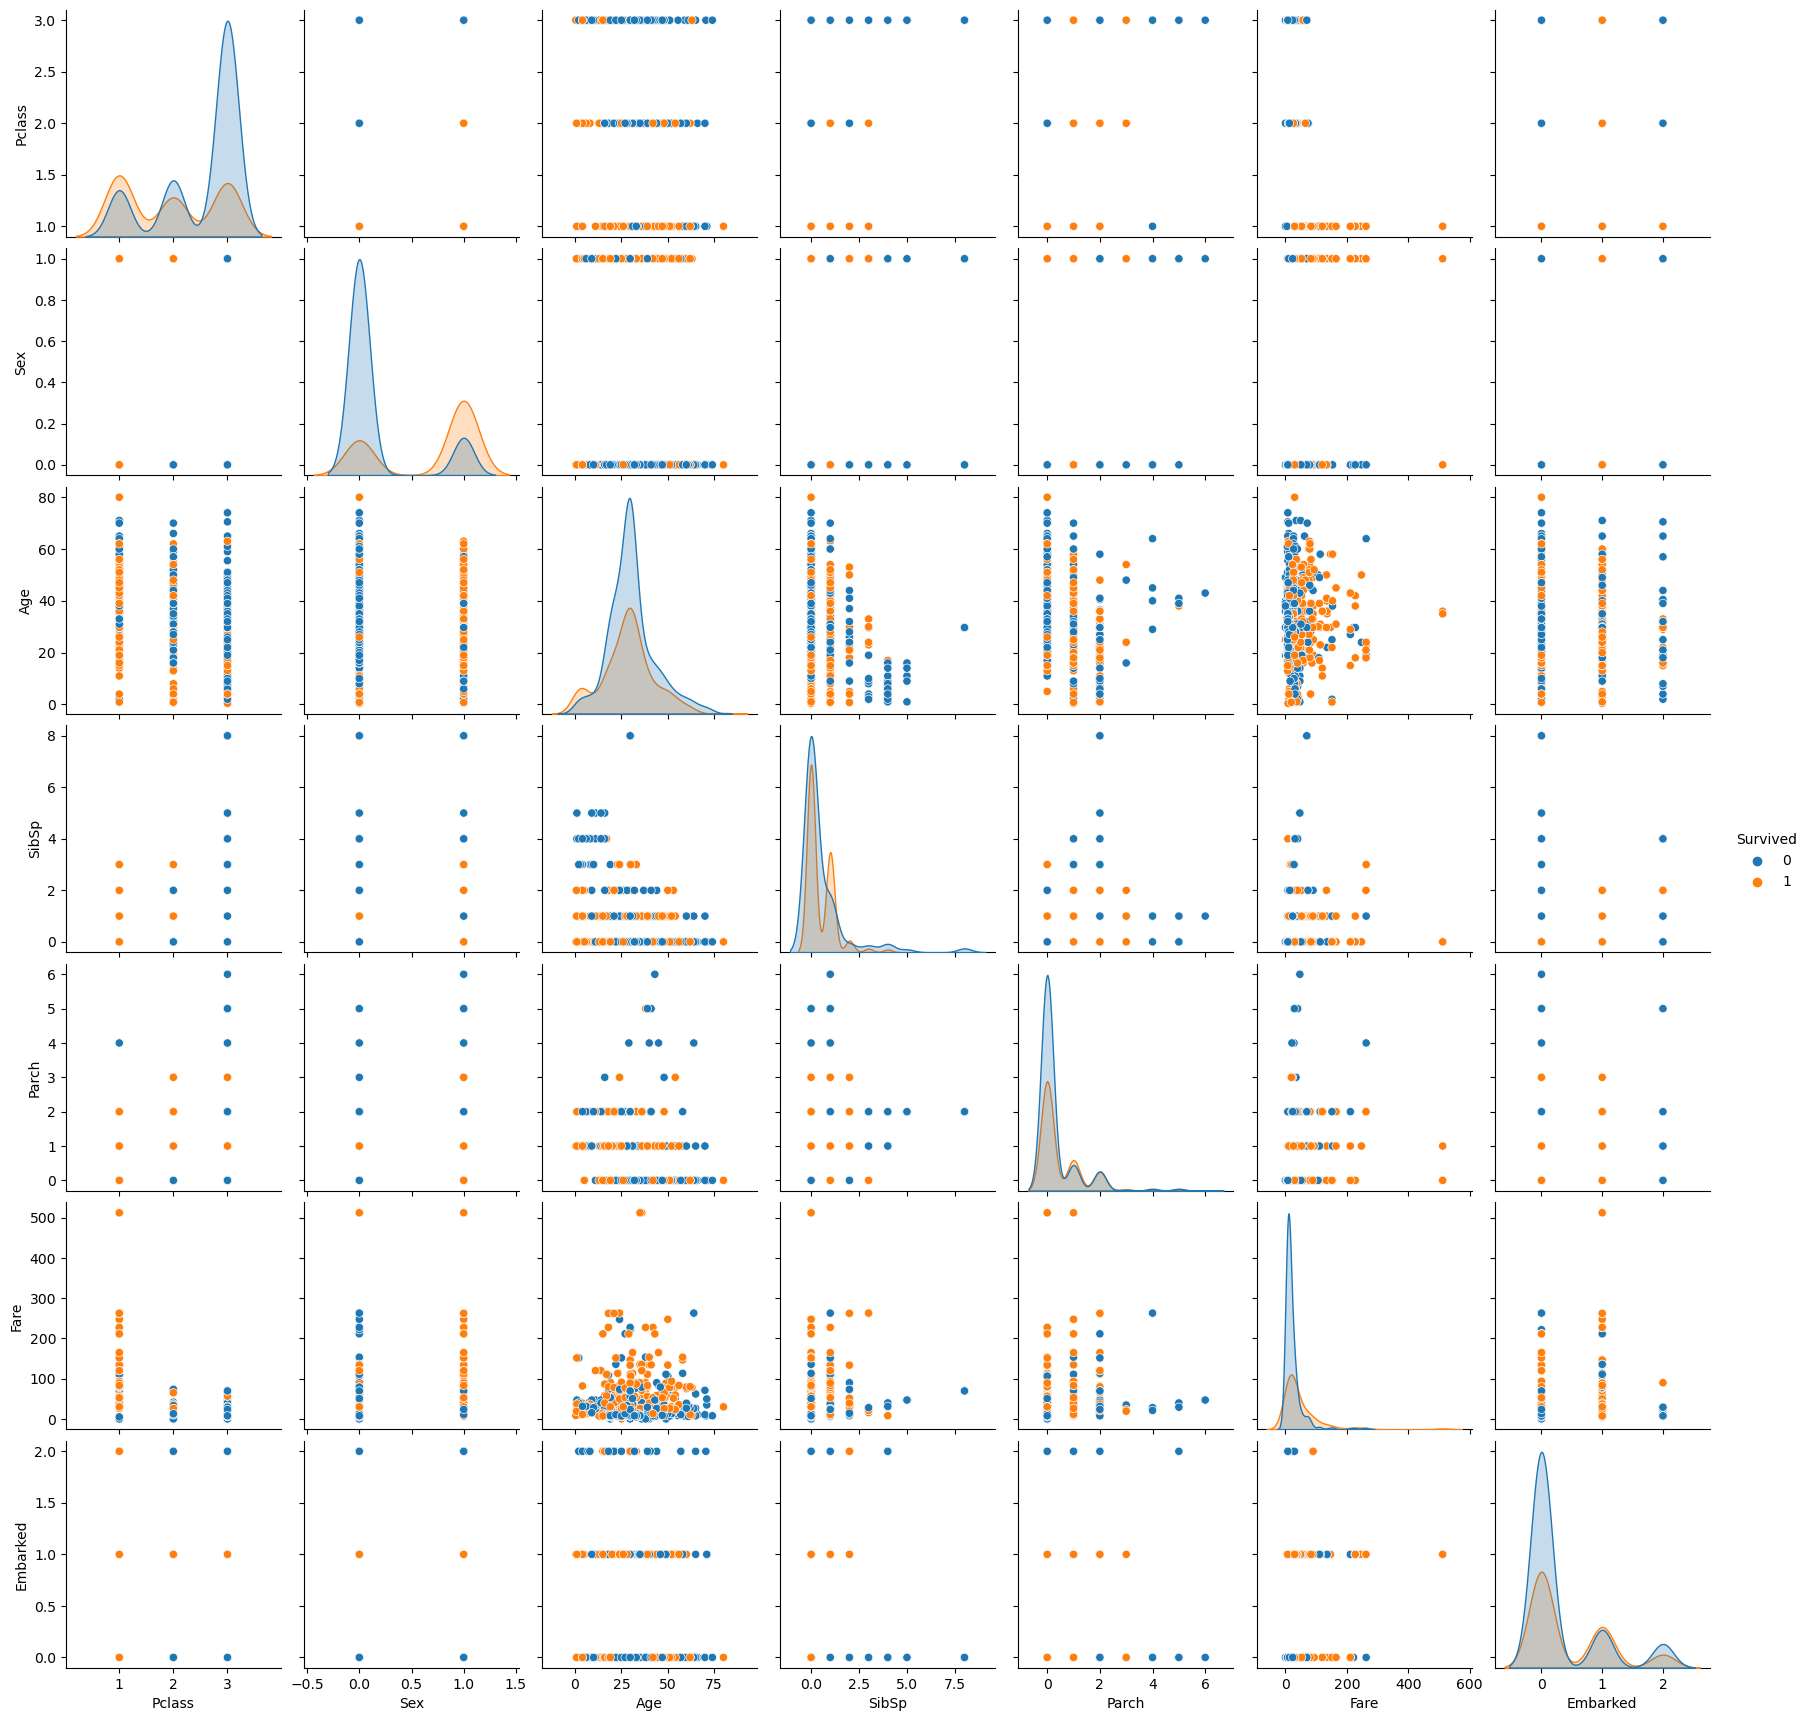

In [42]:
sns.pairplot(df_train, hue="Survived")

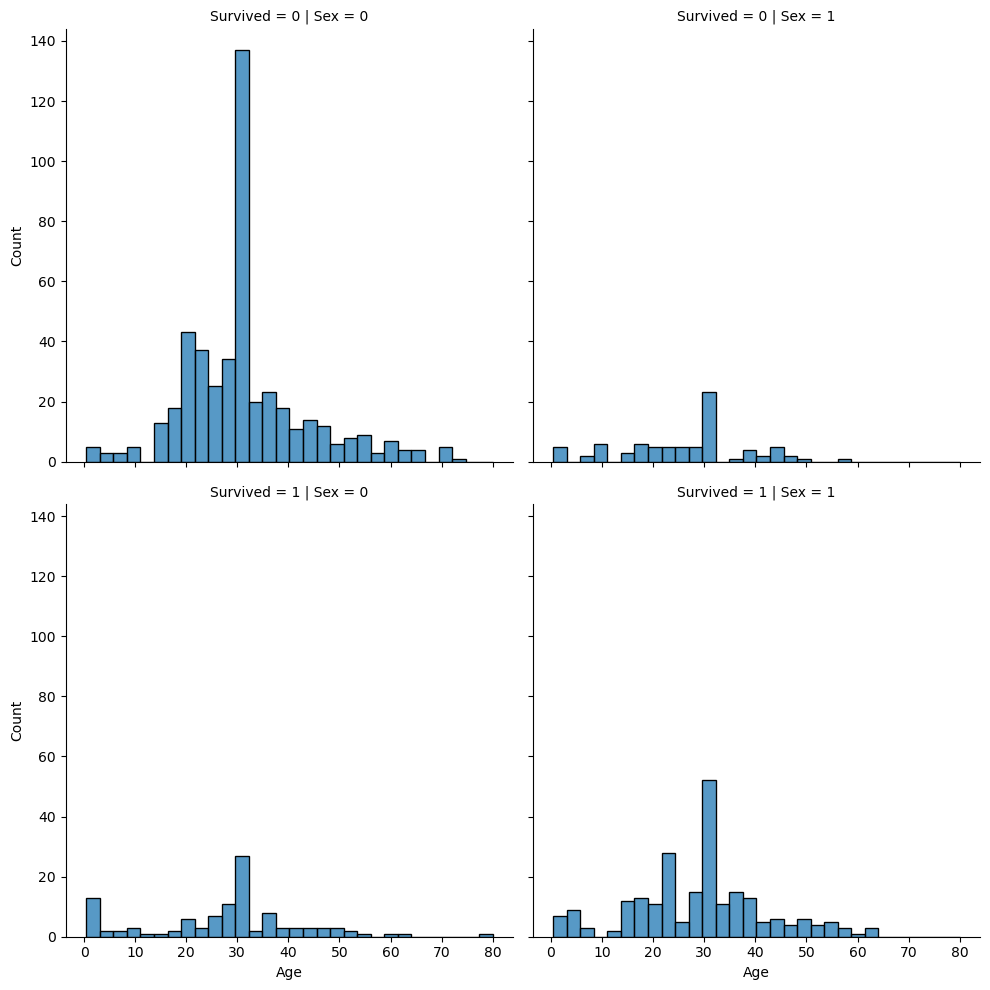

In [43]:
sns.displot(df_train, x="Age",col='Sex',row='Survived')

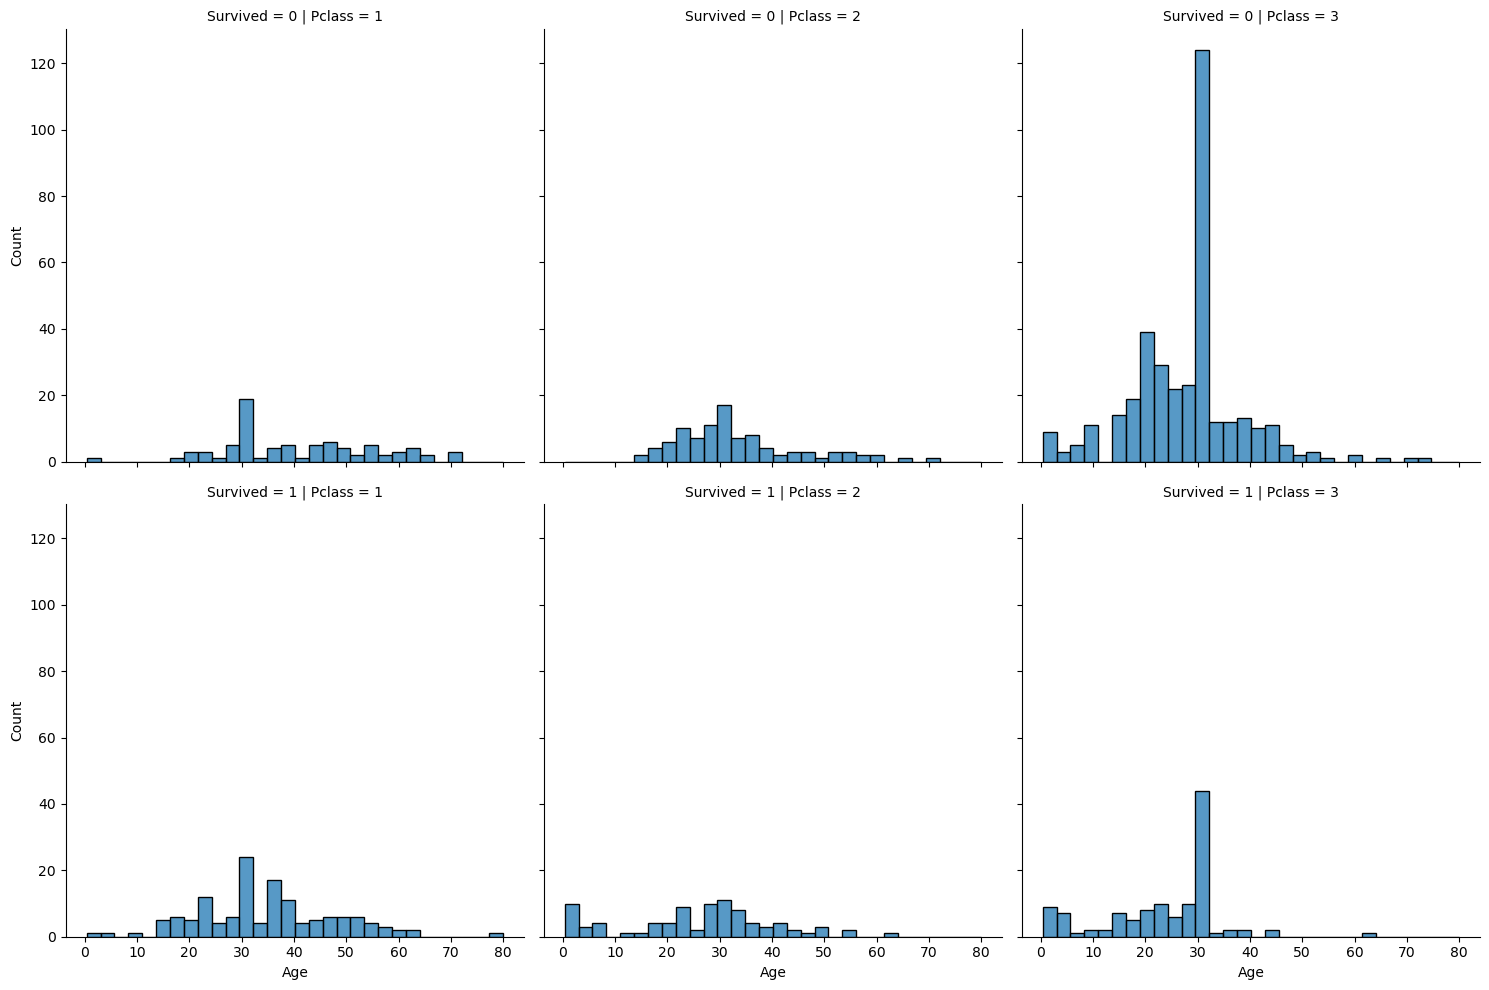

In [44]:
sns.displot(df_train, x="Age",col='Pclass',row='Survived')

## To continue...

You may find more correlations hints that could help the model to predict which passenger survised or not.

# Machine learning Model

Examples of models that can be used:

- **Linear Models**
-- Ordinary Least Squares
-- Ridge regression and classification
-- Lasso
-- Perceptron

- **Support Vector Machines**
- **Nearest Neighbors**
-- Unsupervised Nearest Neighbors
-- Nearest Neighbors Classification
- **Gaussian Processes**
- **Naive Bayes**
- **Decision Trees**
- **Ensemble methods**
-- Forests of randomized trees
-- AdaBoost
-- Gradient Tree Boosting
-- Histogram-Based Gradient Boosting
- **Neural network models**
-- Multi-layer Perceptron


More inforation and suggested library to use: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

In [14]:
#TODO

# Visualization Web App

Propose a web interface that allow any usert to interact with data and discover insight. 

You have to use the following tools:
https://plotly.com/dash/

Examples of webapp: https://dash.gallery/Portal/